# UFPA PPGCC: Aprendizado de Máquina 
# Aluno: Rafael Barbosa de Salles

## 1. (1.0 pt) Os dados abaixo se referem a taxas de colesterol total (mg/100ml) de 30 indivíduos. Utilize duas casas decimais para o cálculo.
- a. Montar uma tabela de distribuição de frequência por intervalo para as taxas (utilize a regra de Sturges para calcular o número de classes intervalos).

- b. Calcule o histograma

- c. Calcule as frequências relativas, às frequências acumuladas absolutas e relativivas e os pontos médios para todas as classes
  
- d. Calcule a taxa de colesterol média
  
- e. Calcule a taxa de colesterol mediana

- f. Calcule a variância e o desvio padrão amostralostral



In [256]:

## Lista de registros
registros = [140,160,168,180,180,180,180,184,185,190,190,192,192,196,200,200,200,205,205,208,214,214,220,220,225,230,240,260,280,315]

dados = [(1, 140),(2, 160),(3, 168),(4, 180),(5, 180),(6, 180),(7, 180),(8, 184),(9, 185),(10, 190),(11, 190),(12, 192),(13, 192),(14, 196),(15, 200),(16, 200),(17, 200),(18, 205),(19, 205),(20, 208),(21, 214),(22, 214),(23, 220),(24, 220),(25, 225),(26, 230),(27, 240),(28, 260),(29, 280),(30, 315)]


# Criando um DataFrame a partir dos dados
import pandas as pd
dataframe = pd.DataFrame(dados, columns=['Identificador', 'Colesterol'])

# Ordenando por Valor
df_ordenado = dataframe.sort_values('Colesterol')

# Convertendo para float
dataframe['Colesterol'] = dataframe['Colesterol'].astype(float)

# incluir nova coluna
# dataframe['Novo_Valor'] = dataframe['Colesterol'] + 1

print(df_ordenado)

    Identificador  Colesterol
0               1         140
1               2         160
2               3         168
3               4         180
4               5         180
5               6         180
6               7         180
7               8         184
8               9         185
9              10         190
10             11         190
11             12         192
12             13         192
13             14         196
16             17         200
14             15         200
15             16         200
17             18         205
18             19         205
19             20         208
20             21         214
21             22         214
22             23         220
23             24         220
24             25         225
25             26         230
26             27         240
27             28         260
28             29         280
29             30         315


In [213]:
# Distribuiçãop de frequência
import numpy as np

# Calculando o número de classes pela regra de Sturges
num_classes = int(np.ceil(1 + np.log2(len(dataframe))))

# Criando os intervalos e contando a frequência
dataframe['Intervalo'] = pd.cut(dataframe['Colesterol'], bins=num_classes)
freq_distribuicao = dataframe['Intervalo'].value_counts().sort_index()

# Criando um DataFrame com a distribuição de frequência
frequencia = pd.DataFrame({'Intervalo': freq_distribuicao.index, 'Frequência': freq_distribuicao.values})

print(frequencia)

            Intervalo  Frequência
0  (139.825, 169.167]           3
1  (169.167, 198.333]          11
2    (198.333, 227.5]          11
3    (227.5, 256.667]           2
4  (256.667, 285.833]           2
5    (285.833, 315.0]           1


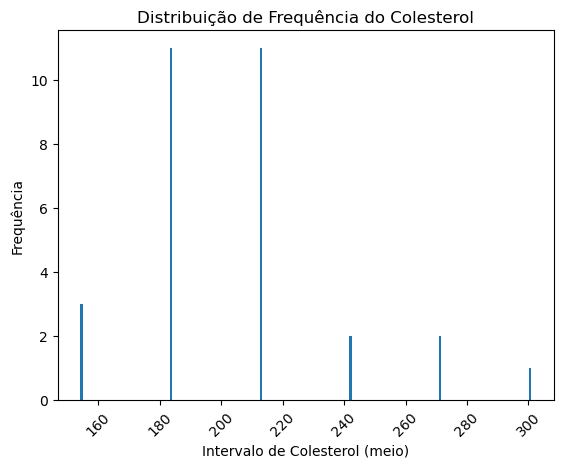

In [215]:
import matplotlib.pyplot as plt


# Extraindo os limites dos intervalos para o eixo x do histograma
intervalos_meio = frequencia['Intervalo'].map(lambda x: x.left + (x.right - x.left) / 2) 

# Criando o histograma
plt.bar(intervalos_meio, frequencia['Frequência'])
plt.xlabel('Intervalo de Colesterol (meio)')
plt.ylabel('Frequência')
plt.title('Distribuição de Frequência do Colesterol')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor visualização
plt.show()


In [223]:
# Calculando a frequência relativa
frequencia['Frequência Relativa'] = df_freq['Frequência'] / frequencia['Frequência'].sum()

# Calculando a frequência acumulada absoluta
frequencia['Frequência Acumulada Absoluta'] = frequencia['Frequência'].cumsum()

# Calculando a frequência acumulada relativa
frequencia['Frequência Acumulada Relativa'] = frequencia['Frequência Acumulada Absoluta'] / frequencia['Frequência'].sum()

# Calculando o ponto médio de cada intervalo
frequencia['Ponto Médio'] = frequencia['Intervalo'].map(lambda x: x.mid)


print(frequencia)

            Intervalo  Frequência  Frequência Relativa  \
0  (139.825, 169.167]           3             0.100000   
1  (169.167, 198.333]          11             0.366667   
2    (198.333, 227.5]          11             0.366667   
3    (227.5, 256.667]           2             0.066667   
4  (256.667, 285.833]           2             0.066667   
5    (285.833, 315.0]           1             0.033333   

   Frequência Acumulada Absoluta  Frequência Acumulada Relativa Ponto Médio  
0                              3                       0.100000    154.4960  
1                             14                       0.466667    183.7500  
2                             25                       0.833333    212.9165  
3                             27                       0.900000    242.0835  
4                             29                       0.966667    271.2500  
5                             30                       1.000000    300.4165  


In [227]:
# Calculando a média, mediana, variância e desvio padrão
media = df['Colesterol'].mean()
mediana = df['Colesterol'].median()
variancia = df['Colesterol'].var()
desvio_padrao = df['Colesterol'].std()

print(f"Média: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Variância: {variancia:.2f}")
print(f"Desvio Padrão: {desvio_padrao:.2f}")

Média: 205.10
Mediana: 200.00
Variância: 1224.99
Desvio Padrão: 35.00


## 2. (1.5 pt) Considere que os valores assumidos por um dado atributo numérico são listados no vetor x = {1, 3, 2, 3, 2, 2, 0, 1, 0, 0, 3, 0, 2, 3, 2, 2, 3, 3, 0, 3, 2, 0}.
- a) Calcule o histograma de x (utilize o bom senso para definir o número de classes). 
- b) Supondo que tais valores correspondem aos assumidos em um experimento por uma variável aleatória X, estime sua média E[X] = µ, E[X2], variância σx2, o desvio padrão σx e o desvio médio absoluto.
- c) X é uma variável aleatória ou contínua?

In [306]:

## Lista de registros
dados_x = [1, 3, 2, 3, 2, 2, 0, 1, 0, 0, 3, 0, 2, 3, 2, 2, 3, 3, 0, 3, 2, 0]

# Criando um DataFrame a partir dos dados
import pandas as pd
df_x = pd.DataFrame(dados_x, columns=['Valor'])

# Ordenando por Valor
df_x_ordenado = df_x.sort_values('Valor')

print(df_x_ordenado)

    Valor
21      0
18      0
11      0
9       0
8       0
6       0
7       1
0       1
4       2
20      2
2       2
12      2
14      2
15      2
5       2
3       3
13      3
16      3
17      3
1       3
19      3
10      3


In [284]:
# Distribuição de frequência

# Calculando o número de classes pela regra de Sturges (adaptada para dados discretos)
num_classes = len(df_x['Valor'].unique())

# Criando os intervalos e contando a frequência
# Como os dados são discretos, os intervalos serão os próprios valores únicos
freq_distribuicao = df_x['Valor'].value_counts().sort_index()

# Criando um DataFrame com a distribuição de frequência
distribuicao_frequencia = pd.DataFrame({'Valor': freq_distribuicao.index, 'Frequência': freq_distribuicao.values})

print(distribuicao_frequencia)

   Valor  Frequência
0      0           6
1      1           2
2      2           7
3      3           7


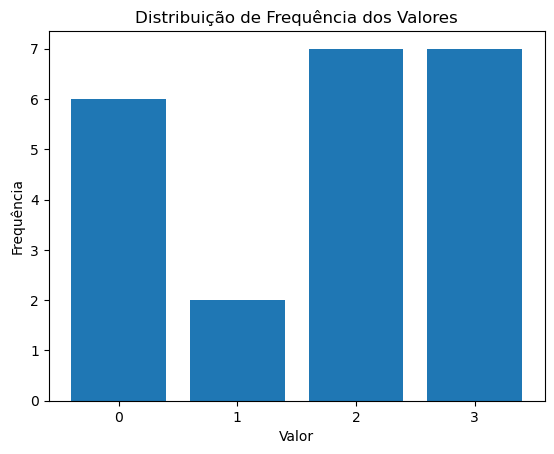

In [298]:
# Criando o histograma
plt.bar(distribuicao_frequencia['Valor'], distribuicao_frequencia['Frequência'])
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.title('Distribuição de Frequência dos Valores')
plt.xticks(distribuicao_frequencia['Valor'])  # Garante que todos os valores apareçam no eixo x
plt.show()

In [308]:
# Calculando as medidas
media_x = df_x['Valor'].mean()
variancia_x = df_x['Valor'].var()
desvio_padrao_x = df_x['Valor'].std()

# Calculando o quadrado da média
media_quadrado = media**2

# Calculando o valor esperado de X^2
ex2 = (df_x['Valor']**2).mean()

# Calculando o desvio médio absoluto
desvio_medio_absoluto_x = np.mean(np.abs(df_x['Valor'] - media))

print(f"Média (E[X]): {media_x:.2f}")
print(f"E[X^2]: {ex2:.2f}")
print(f"Variância (σ^2): {variancia_x:.2f}")
print(f"Desvio Padrão (σ): {desvio_padrao_x:.2f}")
print(f"Desvio Médio Absoluto: {desvio_medio_absoluto_x:.2f}")
print("X é uma variável aleatória")


Média (E[X]): 1.68
E[X^2]: 4.23
Variância (σ^2): 1.47
Desvio Padrão (σ): 1.21
Desvio Médio Absoluto: 1.04
X é uma variável aleatória


## 3. (2.0 pt) Use um editor de texto ASCII para verificar o conteúdo do arquivo iris.arff (o qual vem com Weka). Estude-o também usando a GUI chamada Explorer do pacote Weka. Copie a iris.arff para um novo arquivo chamado iris.csv, elimine o header (primeiras linhas, antes de @data), e leia o arquivo iris.cvs no Excel. Escreva código em Java ou outra linguagem de sua preferência para calcular a variância do terceiro parâmetro (terceiro elemento de x) a partir da leitura do arquivo iris.csv. Compare o resultado com as variâncias estimadas pelos programas Weka e Excel. Inclua a listagem de seu código.



Skip to content
 
Search…
All gists
Back to GitHub
Sign in
Sign up
Instantly share code, notes, and snippets.

@myui
myui/iris.arff
Created 9 years ago
Code
Revisions
1
Stars
7
Forks
5
Clone this repository at &lt;script src=&quot;https://gist.github.com/myui/143fa9d05bd6e7db0114.js&quot;&gt;&lt;/script&gt;
<script src="https://gist.github.com/myui/143fa9d05bd6e7db0114.js"></script>
iris.arff
% 1. Title: Iris Plants Database
% 
% 2. Sources:
%      (a) Creator: R.A. Fisher
%      (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
%      (c) Date: July, 1988
% 
% 3. Past Usage:
%    - Publications: too many to mention!!!  Here are a few.
%    1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
%       Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
%       to Mathematical Statistics" (John Wiley, NY, 1950).
%    2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
%       (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
%    3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
%       Structure and Classification Rule for Recognition in Partially Exposed
%       Environments".  IEEE Transactions on Pattern Analysis and Machine
%       Intelligence, Vol. PAMI-2, No. 1, 67-71.
%       -- Results:
%          -- very low misclassification rates (0% for the setosa class)
%    4. Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE 
%       Transactions on Information Theory, May 1972, 431-433.
%       -- Results:
%          -- very low misclassification rates again
%    5. See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al's AUTOCLASS II
%       conceptual clustering system finds 3 classes in the data.
% 
% 4. Relevant Information:
%    --- This is perhaps the best known database to be found in the pattern
%        recognition literature.  Fisher's paper is a classic in the field
%        and is referenced frequently to this day.  (See Duda & Hart, for
%        example.)  The data set contains 3 classes of 50 instances each,
%        where each class refers to a type of iris plant.  One class is
%        linearly separable from the other 2; the latter are NOT linearly
%        separable from each other.
%    --- Predicted attribute: class of iris plant.
%    --- This is an exceedingly simple domain.
% 
% 5. Number of Instances: 150 (50 in each of three classes)
% 
% 6. Number of Attributes: 4 numeric, predictive attributes and the class
% 
% 7. Attribute Information:
%    1. sepal length in cm
%    2. sepal width in cm
%    3. petal length in cm
%    4. petal width in cm
%    5. class: 
%       -- Iris Setosa
%       -- Iris Versicolour
%       -- Iris Virginica
% 
% 8. Missing Attribute Values: None
% 
% Summary Statistics:
%  	           Min  Max   Mean    SD   Class Correlation
%    sepal length: 4.3  7.9   5.84  0.83    0.7826   
%     sepal width: 2.0  4.4   3.05  0.43   -0.4194
%    petal length: 1.0  6.9   3.76  1.76    0.9490  (high!)
%     petal width: 0.1  2.5   1.20  0.76    0.9565  (high!)
% 
% 9. Class Distribution: 33.3% for each of 3 classes.

@RELATION iris

@ATTRIBUTE sepallength	REAL
@ATTRIBUTE sepalwidth 	REAL
@ATTRIBUTE petallength 	REAL
@ATTRIBUTE petalwidth	REAL
@ATTRIBUTE class 	{Iris-setosa,Iris-versicolor,Iris-virginica}

@DATA
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.4,3.7,1.5,0.2,Iris-setosa
4.8,3.4,1.6,0.2,Iris-setosa
4.8,3.0,1.4,0.1,Iris-setosa
4.3,3.0,1.1,0.1,Iris-setosa
5.8,4.0,1.2,0.2,Iris-setosa
5.7,4.4,1.5,0.4,Iris-setosa
5.4,3.9,1.3,0.4,Iris-setosa
5.1,3.5,1.4,0.3,Iris-setosa
5.7,3.8,1.7,0.3,Iris-setosa
5.1,3.8,1.5,0.3,Iris-setosa
5.4,3.4,1.7,0.2,Iris-setosa
5.1,3.7,1.5,0.4,Iris-setosa
4.6,3.6,1.0,0.2,Iris-setosa
5.1,3.3,1.7,0.5,Iris-setosa
4.8,3.4,1.9,0.2,Iris-setosa
5.0,3.0,1.6,0.2,Iris-setosa
5.0,3.4,1.6,0.4,Iris-setosa
5.2,3.5,1.5,0.2,Iris-setosa
5.2,3.4,1.4,0.2,Iris-setosa
4.7,3.2,1.6,0.2,Iris-setosa
4.8,3.1,1.6,0.2,Iris-setosa
5.4,3.4,1.5,0.4,Iris-setosa
5.2,4.1,1.5,0.1,Iris-setosa
5.5,4.2,1.4,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
5.0,3.2,1.2,0.2,Iris-setosa
5.5,3.5,1.3,0.2,Iris-setosa
4.9,3.1,1.5,0.1,Iris-setosa
4.4,3.0,1.3,0.2,Iris-setosa
5.1,3.4,1.5,0.2,Iris-setosa
5.0,3.5,1.3,0.3,Iris-setosa
4.5,2.3,1.3,0.3,Iris-setosa
4.4,3.2,1.3,0.2,Iris-setosa
5.0,3.5,1.6,0.6,Iris-setosa
5.1,3.8,1.9,0.4,Iris-setosa
4.8,3.0,1.4,0.3,Iris-setosa
5.1,3.8,1.6,0.2,Iris-setosa
4.6,3.2,1.4,0.2,Iris-setosa
5.3,3.7,1.5,0.2,Iris-setosa
5.0,3.3,1.4,0.2,Iris-setosa
7.0,3.2,4.7,1.4,Iris-versicolor
6.4,3.2,4.5,1.5,Iris-versicolor
6.9,3.1,4.9,1.5,Iris-versicolor
5.5,2.3,4.0,1.3,Iris-versicolor
6.5,2.8,4.6,1.5,Iris-versicolor
5.7,2.8,4.5,1.3,Iris-versicolor
6.3,3.3,4.7,1.6,Iris-versicolor
4.9,2.4,3.3,1.0,Iris-versicolor
6.6,2.9,4.6,1.3,Iris-versicolor
5.2,2.7,3.9,1.4,Iris-versicolor
5.0,2.0,3.5,1.0,Iris-versicolor
5.9,3.0,4.2,1.5,Iris-versicolor
6.0,2.2,4.0,1.0,Iris-versicolor
6.1,2.9,4.7,1.4,Iris-versicolor
5.6,2.9,3.6,1.3,Iris-versicolor
6.7,3.1,4.4,1.4,Iris-versicolor
5.6,3.0,4.5,1.5,Iris-versicolor
5.8,2.7,4.1,1.0,Iris-versicolor
6.2,2.2,4.5,1.5,Iris-versicolor
5.6,2.5,3.9,1.1,Iris-versicolor
5.9,3.2,4.8,1.8,Iris-versicolor
6.1,2.8,4.0,1.3,Iris-versicolor
6.3,2.5,4.9,1.5,Iris-versicolor
6.1,2.8,4.7,1.2,Iris-versicolor
6.4,2.9,4.3,1.3,Iris-versicolor
6.6,3.0,4.4,1.4,Iris-versicolor
6.8,2.8,4.8,1.4,Iris-versicolor
6.7,3.0,5.0,1.7,Iris-versicolor
6.0,2.9,4.5,1.5,Iris-versicolor
5.7,2.6,3.5,1.0,Iris-versicolor
5.5,2.4,3.8,1.1,Iris-versicolor
5.5,2.4,3.7,1.0,Iris-versicolor
5.8,2.7,3.9,1.2,Iris-versicolor
6.0,2.7,5.1,1.6,Iris-versicolor
5.4,3.0,4.5,1.5,Iris-versicolor
6.0,3.4,4.5,1.6,Iris-versicolor
6.7,3.1,4.7,1.5,Iris-versicolor
6.3,2.3,4.4,1.3,Iris-versicolor
5.6,3.0,4.1,1.3,Iris-versicolor
5.5,2.5,4.0,1.3,Iris-versicolor
5.5,2.6,4.4,1.2,Iris-versicolor
6.1,3.0,4.6,1.4,Iris-versicolor
5.8,2.6,4.0,1.2,Iris-versicolor
5.0,2.3,3.3,1.0,Iris-versicolor
5.6,2.7,4.2,1.3,Iris-versicolor
5.7,3.0,4.2,1.2,Iris-versicolor
5.7,2.9,4.2,1.3,Iris-versicolor
6.2,2.9,4.3,1.3,Iris-versicolor
5.1,2.5,3.0,1.1,Iris-versicolor
5.7,2.8,4.1,1.3,Iris-versicolor
6.3,3.3,6.0,2.5,Iris-virginica
5.8,2.7,5.1,1.9,Iris-virginica
7.1,3.0,5.9,2.1,Iris-virginica
6.3,2.9,5.6,1.8,Iris-virginica
6.5,3.0,5.8,2.2,Iris-virginica
7.6,3.0,6.6,2.1,Iris-virginica
4.9,2.5,4.5,1.7,Iris-virginica
7.3,2.9,6.3,1.8,Iris-virginica
6.7,2.5,5.8,1.8,Iris-virginica
7.2,3.6,6.1,2.5,Iris-virginica
6.5,3.2,5.1,2.0,Iris-virginica
6.4,2.7,5.3,1.9,Iris-virginica
6.8,3.0,5.5,2.1,Iris-virginica
5.7,2.5,5.0,2.0,Iris-virginica
5.8,2.8,5.1,2.4,Iris-virginica
6.4,3.2,5.3,2.3,Iris-virginica
6.5,3.0,5.5,1.8,Iris-virginica
7.7,3.8,6.7,2.2,Iris-virginica
7.7,2.6,6.9,2.3,Iris-virginica
6.0,2.2,5.0,1.5,Iris-virginica
6.9,3.2,5.7,2.3,Iris-virginica
5.6,2.8,4.9,2.0,Iris-virginica
7.7,2.8,6.7,2.0,Iris-virginica
6.3,2.7,4.9,1.8,Iris-virginica
6.7,3.3,5.7,2.1,Iris-virginica
7.2,3.2,6.0,1.8,Iris-virginica
6.2,2.8,4.8,1.8,Iris-virginica
6.1,3.0,4.9,1.8,Iris-virginica
6.4,2.8,5.6,2.1,Iris-virginica
7.2,3.0,5.8,1.6,Iris-virginica
7.4,2.8,6.1,1.9,Iris-virginica
7.9,3.8,6.4,2.0,Iris-virginica
6.4,2.8,5.6,2.2,Iris-virginica
6.3,2.8,5.1,1.5,Iris-virginica
6.1,2.6,5.6,1.4,Iris-virginica
7.7,3.0,6.1,2.3,Iris-virginica
6.3,3.4,5.6,2.4,Iris-virginica
6.4,3.1,5.5,1.8,Iris-virginica
6.0,3.0,4.8,1.8,Iris-virginica
6.9,3.1,5.4,2.1,Iris-virginica
6.7,3.1,5.6,2.4,Iris-virginica
6.9,3.1,5.1,2.3,Iris-virginica
5.8,2.7,5.1,1.9,Iris-virginica
6.8,3.2,5.9,2.3,Iris-virginica
6.7,3.3,5.7,2.5,Iris-virginica
6.7,3.0,5.2,2.3,Iris-virginica
6.3,2.5,5.0,1.9,Iris-virginica
6.5,3.0,5.2,2.0,Iris-virginica
6.2,3.4,5.4,2.3,Iris-virginica
5.9,3.0,5.1,1.8,Iris-virginica
%
%
%
 to join this conversation on GitHub. Already have an account? Sign in to comment
Footer
© 2024 GitHub, Inc.
Footer navigation
Terms
Privacy
Security
Status
Docs
Contact
Manage cookies
Do not share my personal information


## 4. (2.5 pt) O Coeficiente de varia¸cão (CV) é uma medida relativa de variabilidade que independe da unidade de medida utilizada CV = (Desviopadrao/Media). E possível útilizar o CV para selecionar os ”melhores” atributos, ou seja, aqueles que contenham os menores valores de CV. Selecione duas bases de dados do UCI e construa um gráfico (Taxa de erro versus conjunto de atributos) para cada base. Utilize o classificador 1- NN para estimar a taxa de erro. Os conjuntos de atributos ser˜ao formados da seguinte maneira: inicialmente o conjunto irá conter o atributo com o menor CV: no passo seguinte o conjunto irá conter os dois atributos com os menores CVs; e assim por diante até que o conjunto final seja formado por todas os atributos.  


## 5. (2.0 pt) Classifique o dataset iris usando o classificador DecisionStump. Descreva a saída em texto que o Weka fornece, tentando explicar cada um dos itens (e.x., confusion matrix, etc.). Usando o Weka Explorer, verifique se é possível encontrar um outro classificador que alcance uma taxa de erro menor que o Decision Stump. Caso positivo, diga qual o classificador usado (e.x., uma árvore decisão) 